In [318]:
import pandas as pd


In [319]:
df_covid = pd.read_csv('data/RAW_global_confirmed_cases.csv')
df_happiness = pd.read_csv('data/worldwide_happiness_report.csv')

In [320]:
df_covid.head()


,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626


In [321]:
df_covid.columns

Index(['Country/Region', 'Province/State', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/10/20', '12/11/20', '12/12/20', '12/13/20', '12/14/20', '12/15/20',
       '12/16/20', '12/17/20', '12/18/20', '12/19/20'],
      dtype='object', length=337)

In [322]:
# Create monthly COVID-19 dataset
import datetime
import re

# First, let's prepare the data by removing unnecessary columns and aggregating by country
df_covid_clean = df_covid.drop(columns=['Lat', 'Long'], axis=1)
covid_country_agg = df_covid_clean.groupby('Country/Region').sum().reset_index()

# Get date columns (excluding Country/Region and Province/State)
date_columns = [col for col in covid_country_agg.columns if col not in ['Country/Region', 'Province/State']]

print(f"Total date columns: {len(date_columns)}")
print(f"Date range: {date_columns[0]} to {date_columns[-1]}")

Total date columns: 333
Date range: 1/22/20 to 12/19/20


# Create monthly aggregated dataset
from datetime import datetime
import pandas as pd

# Function to parse date and get month-year
def get_month_year(date_str):
    # Parse date in format M/D/YY
    date_obj = datetime.strptime(date_str, '%m/%d/%y')
    return date_obj.strftime('%b %Y')  # Returns format like 'Jan 2020'

# Create a mapping of date columns to months
month_mapping = {}
for col in date_columns:
    month_year = get_month_year(col)
    if month_year not in month_mapping:
        month_mapping[month_year] = []
    month_mapping[month_year].append(col)

print("Months available in dataset:")
for month in sorted(month_mapping.keys(), key=lambda x: datetime.strptime(x, '%b %Y')):
    print(f"{month}: {len(month_mapping[month])} days")

In [323]:
# Create monthly aggregated dataset
from datetime import datetime
import pandas as pd

# Function to parse date and get month-year
def get_month_year(date_str):
    # Parse date in format M/D/YY
    date_obj = datetime.strptime(date_str, '%m/%d/%y')
    return date_obj.strftime('%b %Y')  # Returns format like 'Jan 2020'

# Create a mapping of date columns to months
month_mapping = {}
for col in date_columns:
    month_year = get_month_year(col)
    if month_year not in month_mapping:
        month_mapping[month_year] = []
    month_mapping[month_year].append(col)

print("Months available in dataset:")
for month in sorted(month_mapping.keys(), key=lambda x: datetime.strptime(x, '%b %Y')):
    print(f"{month}: {len(month_mapping[month])} days")

Months available in dataset:
Jan 2020: 10 days
Feb 2020: 29 days
Mar 2020: 31 days
Apr 2020: 30 days
May 2020: 31 days
Jun 2020: 30 days
Jul 2020: 31 days
Aug 2020: 31 days
Sep 2020: 30 days
Oct 2020: 31 days
Nov 2020: 30 days
Dec 2020: 19 days


In [324]:
# Create the monthly dataset in the requested format
monthly_covid_data = covid_country_agg[['Country/Region']].copy()

# Get months in chronological order
months_ordered = sorted(month_mapping.keys(), key=lambda x: datetime.strptime(x, '%b %Y'))

# For each month, calculate the total cases (last day of month - first day of month)
# Since the data is cumulative, we'll take the last available day of each month
for month in months_ordered:
    month_columns = month_mapping[month]
    # Take the last day of the month (highest cumulative count)
    last_day_of_month = max(month_columns, key=lambda x: datetime.strptime(x, '%m/%d/%y'))
    monthly_covid_data[month] = covid_country_agg[last_day_of_month]

# Calculate total cases (last available data point)
last_date_column = max(date_columns, key=lambda x: datetime.strptime(x, '%m/%d/%y'))
monthly_covid_data['Total Cases'] = covid_country_agg[last_date_column]

# Display the dataset
print("Monthly COVID-19 Dataset Format:")
print("Shape:", monthly_covid_data.shape)
print("\nFirst few rows:")
print(monthly_covid_data.head())

Monthly COVID-19 Dataset Format:
Shape: (191, 14)

First few rows:
  Country/Region  Jan 2020  Feb 2020  Mar 2020  Apr 2020  May 2020  Jun 2020  \
0    Afghanistan         0         1       175      2127     15208     31507   
1        Albania         0         0       243       773      1137      2535   
2        Algeria         0         1       716      4006      9394     13907   
3        Andorra         0         0       376       745       764       855   
4         Angola         0         0         7        27        86       284   

   Jul 2020  Aug 2020  Sep 2020  Oct 2020  Nov 2020  Dec 2020  Total Cases  
0     36665     38159     39268     41425     46274     49681        49681  
1      5276      9513     13649     20875     38182     52542        52542  
2     30394     44494     51530     57942     83199     94781        94781  
3       925      1176      2050      4756      6745      7560         7560  
4      1148      2654      4972     10805     15139     16626      

In [325]:
# Show specific examples as requested
print("Examples in the format you requested:")
print("=" * 80)

# Show Afghanistan and India specifically
examples = monthly_covid_data[monthly_covid_data['Country/Region'].isin(['Afghanistan', 'India'])]
for _, row in examples.iterrows():
    country = row['Country/Region']
    monthly_values = []
    for month in months_ordered:
        monthly_values.append(str(int(row[month])))
    total_cases = int(row['Total Cases'])
    
    print(f"{country},{','.join(monthly_values)},{total_cases}")

print("\nColumn headers:")
headers = ['Country/Region'] + months_ordered + ['Total Cases']
print(','.join(headers))

print(f"\nDataset contains {len(monthly_covid_data)} countries/regions")
print(f"Time period: {months_ordered[0]} to {months_ordered[-1]}")

# Optional: Save to CSV
# monthly_covid_data.to_csv('monthly_covid_dataset.csv', index=False)
# print("\nDataset saved as 'monthly_covid_dataset.csv'")

Examples in the format you requested:
Afghanistan,0,1,175,2127,15208,31507,36665,38159,39268,41425,46274,49681,49681
India,1,3,1397,34863,190609,585481,1695988,3691166,6312584,8184082,9462809,10031223,10031223

Column headers:
Country/Region,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Total Cases

Dataset contains 191 countries/regions
Time period: Jan 2020 to Dec 2020


In [326]:
df_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [327]:
df_covid.shape

(271, 337)

In [328]:
##  delete unnecessary columns
df_covid = df_covid.drop(columns=['Lat', 'Long'], axis=1)

In [329]:
df_covid.head()

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,NaN,0,0,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,NaN,0,0,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,NaN,0,0,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,NaN,0,0,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626


In [330]:

df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 335 entries, Country/Region to 12/19/20
dtypes: int64(333), object(2)
memory usage: 709.4+ KB


In [331]:
df_covid.isnull().sum()

Country/Region      0
Province/State    188
1/22/20             0
1/23/20             0
1/24/20             0
                 ... 
12/15/20            0
12/16/20            0
12/17/20            0
12/18/20            0
12/19/20            0
Length: 335, dtype: int64

In [332]:
df_covid['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [333]:
covid_ds_agg = df_covid.groupby('Country/Region').sum().reset_index()

In [334]:
covid_ds_agg.shape, df_covid.shape

((191, 335), (271, 335))

In [335]:
covid_ds_agg.head()

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,0,0,0,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,0,0,0,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,0,0,0,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,0,0,0,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626


In [336]:
date_cols = [c for c in covid_ds_agg.columns if c not in ['Country/Region', 'Province/State']]
covid_ds_agg['Total Cases'] = covid_ds_agg[date_cols].sum(axis=1)

In [337]:
covid_ds_agg.head()

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,Total Cases
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,7876138
1,Albania,0,0,0,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,3061008
2,Algeria,0,0,0,0,0,0,0,0,0,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,9412801
3,Andorra,0,0,0,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,589433
4,Angola,0,0,0,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,1138177


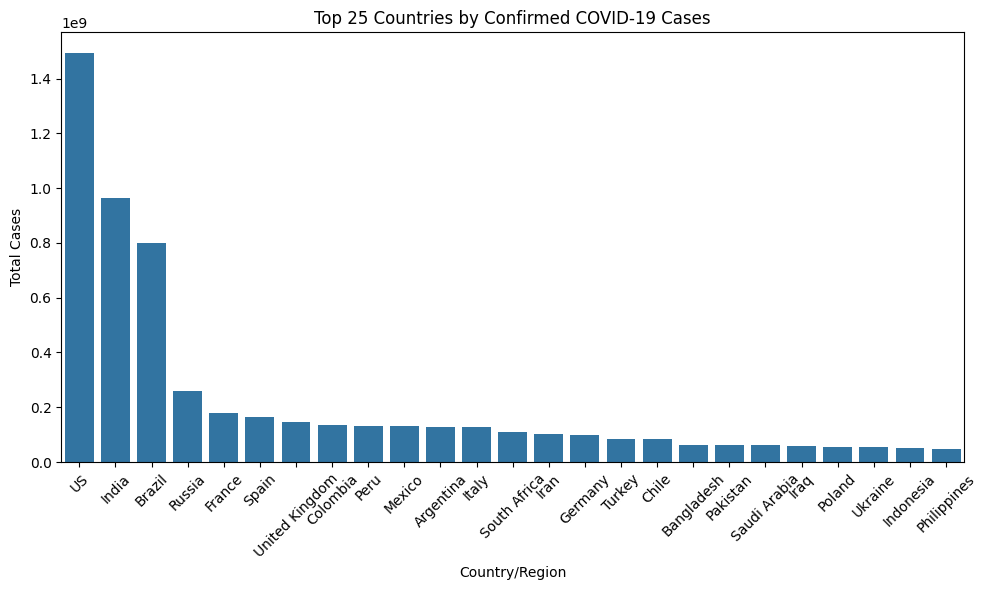

In [338]:
## Plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Country/Region', y='Total Cases', data=covid_ds_agg.sort_values(by='Total Cases', ascending=False).head(25))
plt.xticks(rotation=45)
plt.title('Top 25 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

In [339]:
monthly_covid_data.head()

,Country/Region,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Total Cases
0,Afghanistan,0,1,175,2127,15208,31507,36665,38159,39268,41425,46274,49681,49681
1,Albania,0,0,243,773,1137,2535,5276,9513,13649,20875,38182,52542,52542
2,Algeria,0,1,716,4006,9394,13907,30394,44494,51530,57942,83199,94781,94781
3,Andorra,0,0,376,745,764,855,925,1176,2050,4756,6745,7560,7560
4,Angola,0,0,7,27,86,284,1148,2654,4972,10805,15139,16626,16626


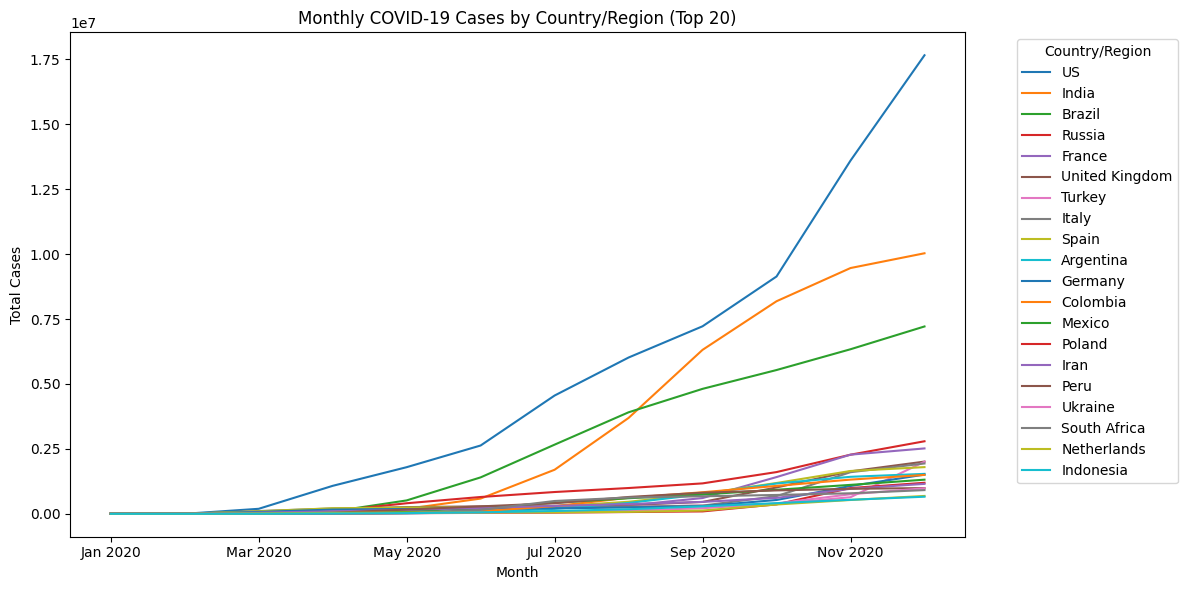

In [340]:
## Plot monthly data for top 20 countries by total cases
top20 = monthly_covid_data.sort_values(by='Total Cases', ascending=False).head(20)
top20.set_index('Country/Region').T.drop('Total Cases').plot(figsize=(12, 6))
plt.title('Monthly COVID-19 Cases by Country/Region (Top 20)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


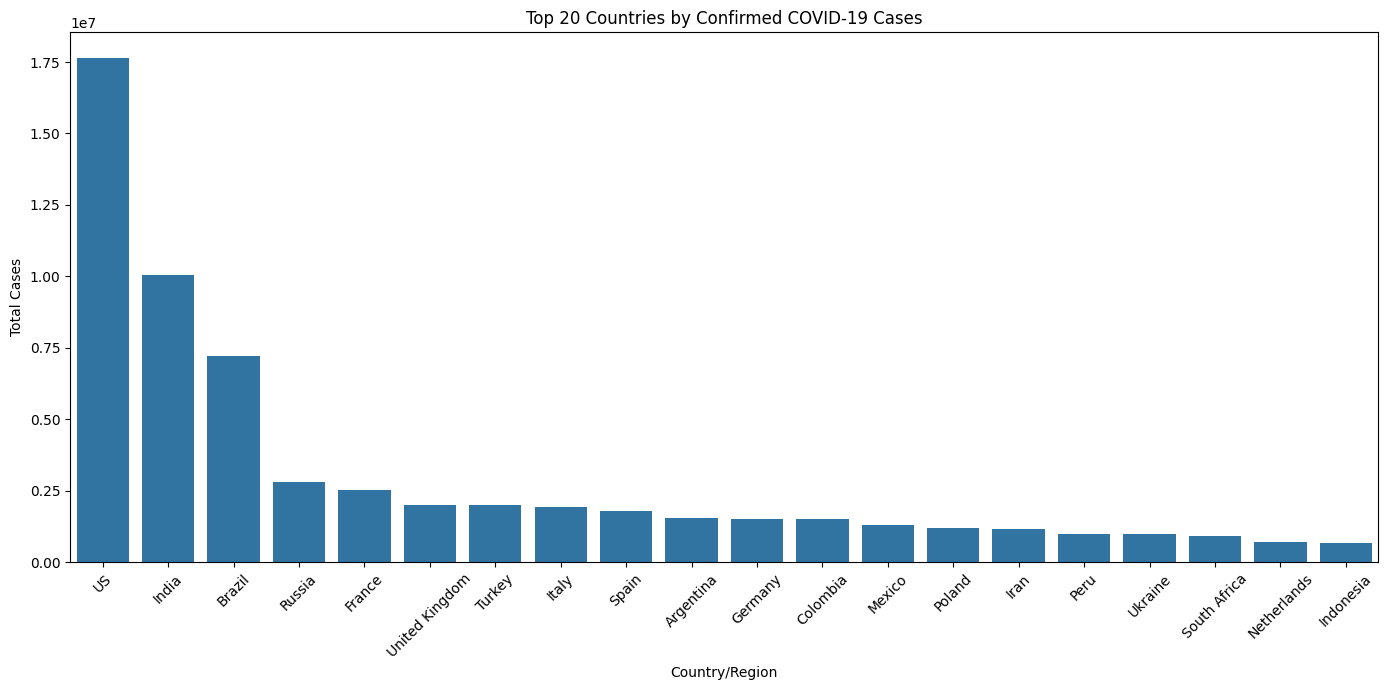

In [341]:
## Plot barplot for top 20 countries by total cases
top20 = monthly_covid_data.sort_values(by='Total Cases', ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x='Country/Region', y='Total Cases', data=top20)
plt.xticks(rotation=45)
plt.title('Top 20 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

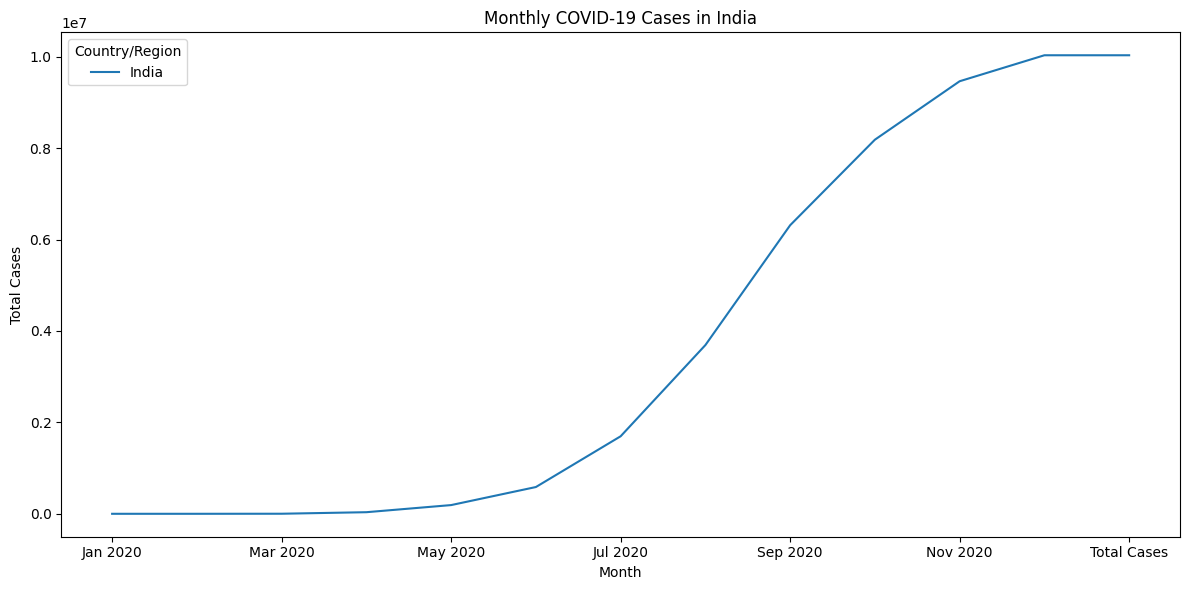

In [342]:
## Plot the monthly data of India
plt.figure(figsize=(12, 6))
india_data = monthly_covid_data[monthly_covid_data['Country/Region'] == 'India'].set_index('Country/Region').T
india_data.plot(figsize=(12, 6))
plt.title('Monthly COVID-19 Cases in India')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

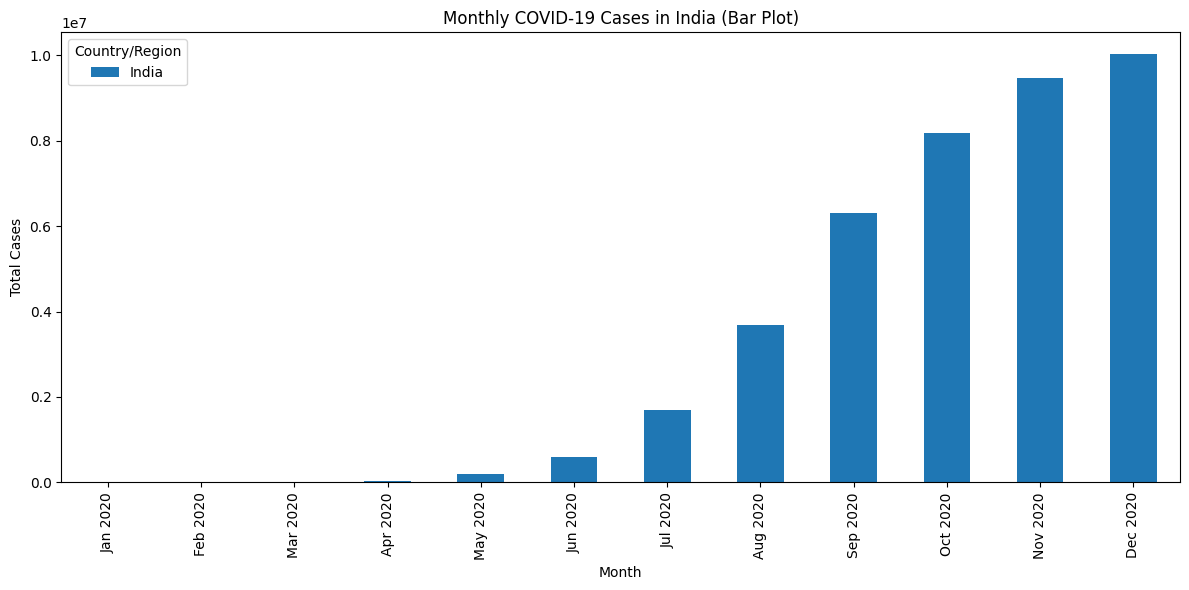

In [343]:
plt.figure(figsize=(12, 6))
india_monthly = india_data.loc[india_data.index != 'Total Cases']
india_monthly.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly COVID-19 Cases in India (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region')
plt.tight_layout()
plt.show()


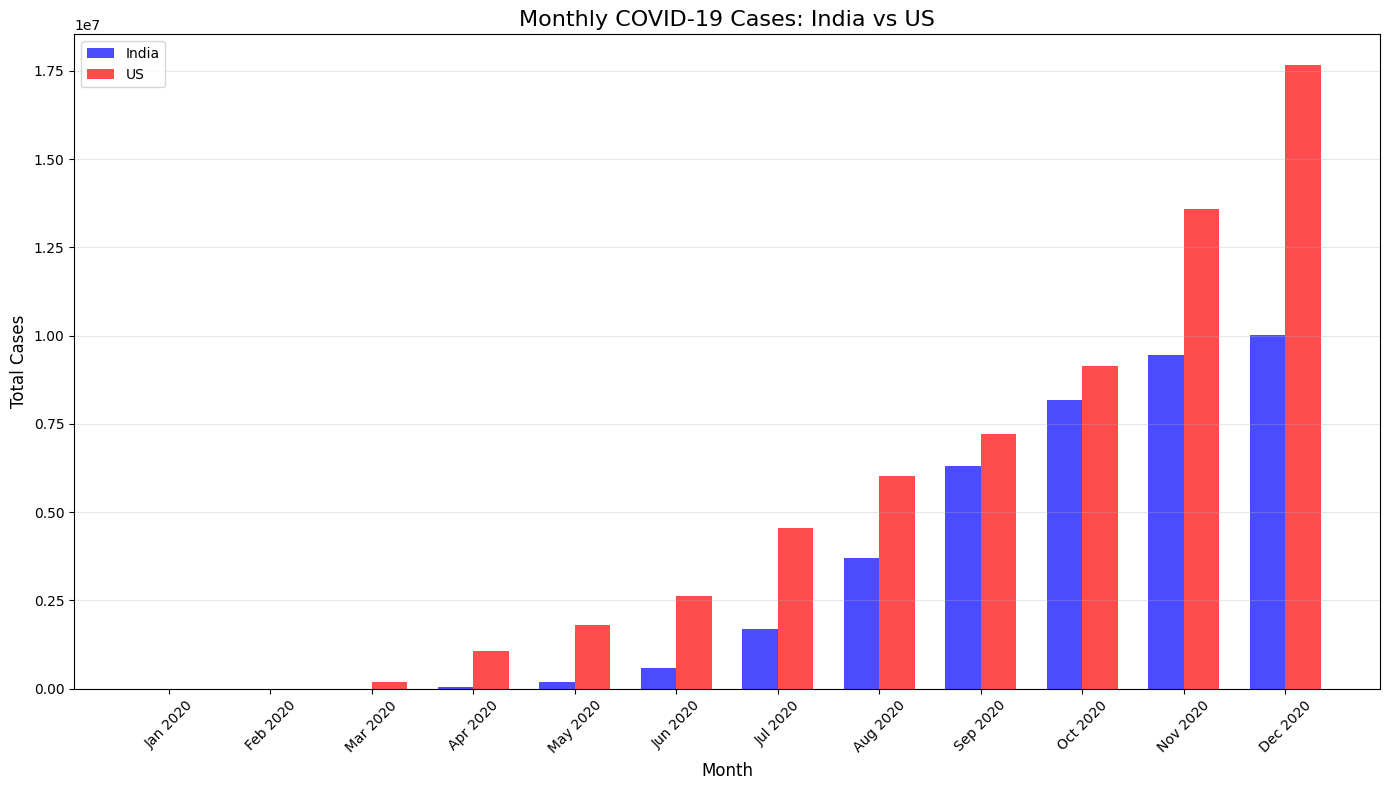

In [344]:
# Plot India and China monthly COVID-19 cases in a combined bar plot
import matplotlib.pyplot as plt

# Extract data for India and China
india_china_data = monthly_covid_data[monthly_covid_data['Country/Region'].isin(['India', 'US'])]

# Prepare data for plotting
india_data = india_china_data[india_china_data['Country/Region'] == 'India'].iloc[0]
china_data = india_china_data[india_china_data['Country/Region'] == 'US'].iloc[0]

# Get monthly columns (exclude Country/Region and Total Cases)
monthly_columns = [col for col in india_china_data.columns if col not in ['Country/Region', 'Total Cases']]

# Create the data for plotting
india_values = [india_data[col] for col in monthly_columns]
china_values = [china_data[col] for col in monthly_columns]

# Create bar plot
plt.figure(figsize=(14, 8))
x = range(len(monthly_columns))
width = 0.35

plt.bar([i - width/2 for i in x], india_values, width, label='India', color='blue', alpha=0.7)
plt.bar([i + width/2 for i in x], china_values, width, label='US', color='red', alpha=0.7)

plt.title('Monthly COVID-19 Cases: India vs US', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(x, monthly_columns, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

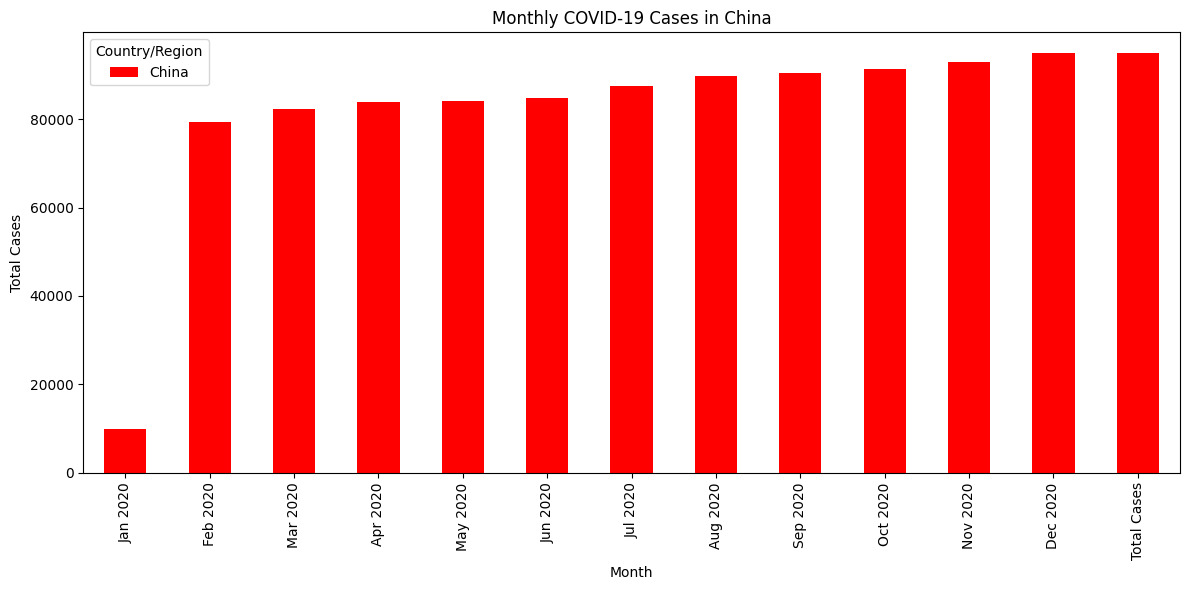

In [345]:
## Plot bar plot for China
china_data = monthly_covid_data[monthly_covid_data['Country/Region'] == 'China'].set_index('Country/Region').T
china_data.plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Monthly COVID-19 Cases in China')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.legend(title='Country/Region')
plt.tight_layout()
plt.show()

# Advanced COVID-19 Data Analysis & Visualization

## Overview
This notebook demonstrates comprehensive data analysis techniques for COVID-19 global confirmed cases dataset. The analysis includes data preprocessing, monthly aggregation, and various visualization techniques to extract meaningful insights.

## Key Features Demonstrated:
- **Data Cleaning & Preprocessing**: Handling missing values, column removal, and data aggregation
- **Time Series Analysis**: Converting daily data to monthly aggregations
- **Statistical Analysis**: Correlation analysis, growth rates, and trend identification
- **Advanced Visualization**: Multiple chart types including bar plots, heatmaps, and comparative analysis
- **Geospatial Insights**: Regional and continental analysis

Let's explore some advanced analytical insights below.

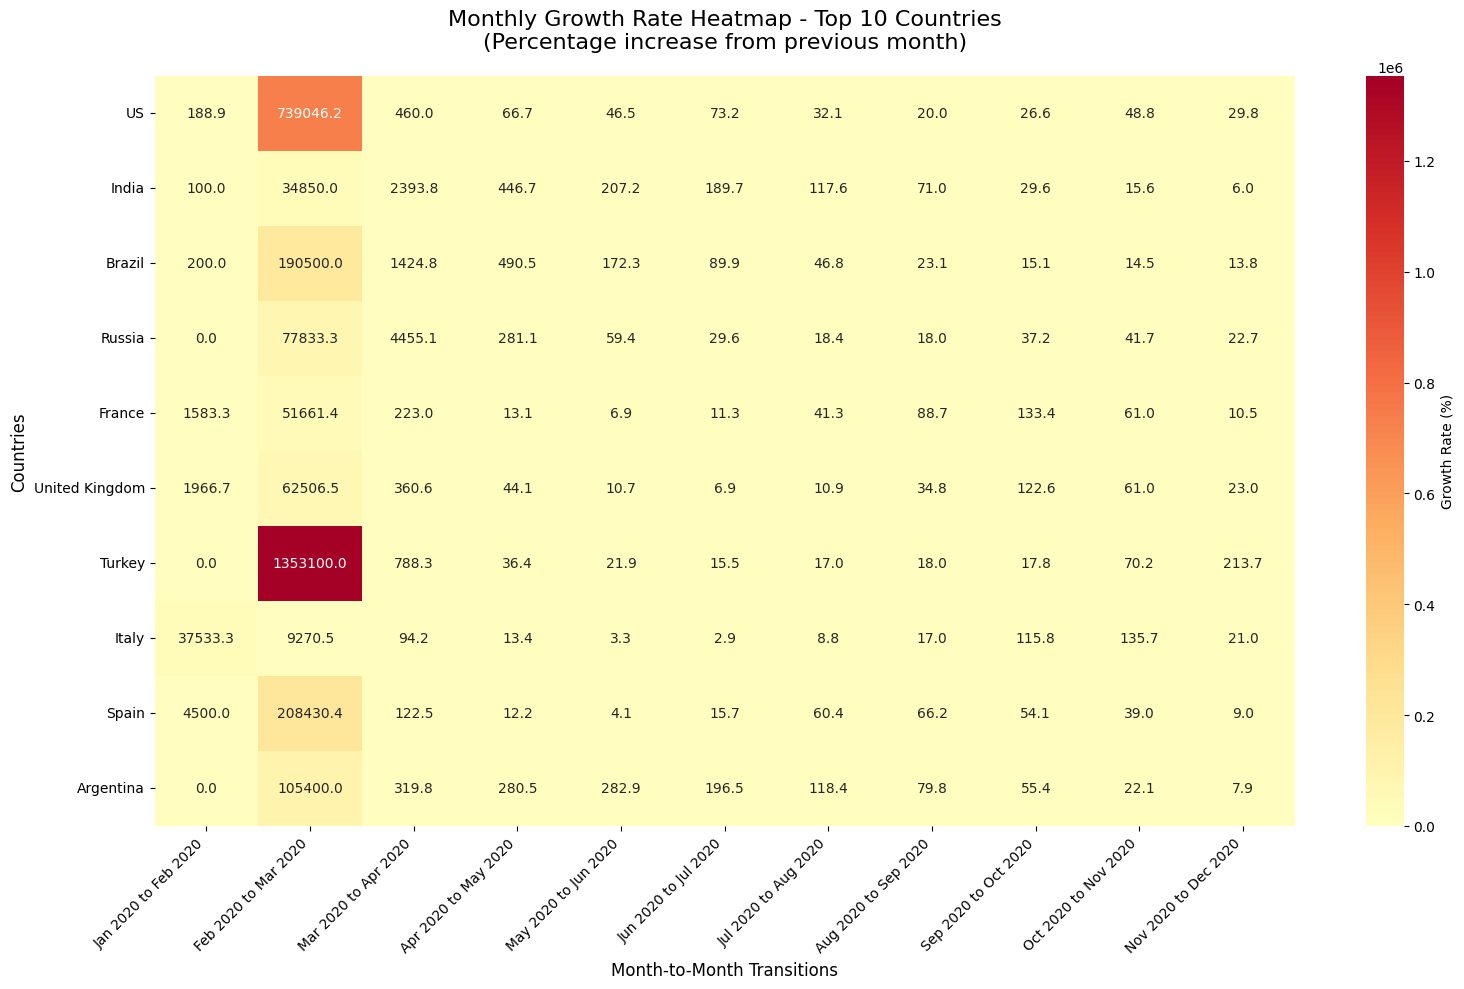

Growth Rate Analysis Complete
Highest growth rate: 1353100.0%
Average growth rate across all countries: 26316.6%


In [346]:
# 1. Monthly Growth Rate Analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate month-over-month growth rates for top 10 countries
top10_countries = monthly_covid_data.sort_values(by='Total Cases', ascending=False).head(10)
monthly_columns = [col for col in monthly_covid_data.columns if col not in ['Country/Region', 'Total Cases']]

# Create growth rate dataframe
growth_rates = pd.DataFrame()
growth_rates['Country/Region'] = top10_countries['Country/Region']

for i in range(1, len(monthly_columns)):
    prev_month = monthly_columns[i-1]
    curr_month = monthly_columns[i]
    
    # Calculate percentage growth rate
    growth_rate = ((top10_countries[curr_month] - top10_countries[prev_month]) / 
                   (top10_countries[prev_month] + 1)) * 100  # +1 to avoid division by zero
    
    growth_rates[f'{prev_month} to {curr_month}'] = growth_rate.values

# Plot heatmap of growth rates
plt.figure(figsize=(16, 10))
growth_data = growth_rates.set_index('Country/Region')
sns.heatmap(growth_data, annot=True, fmt='.1f', cmap='RdYlBu_r', center=0, 
            cbar_kws={'label': 'Growth Rate (%)'})
plt.title('Monthly Growth Rate Heatmap - Top 10 Countries\n(Percentage increase from previous month)', 
          fontsize=16, pad=20)
plt.xlabel('Month-to-Month Transitions', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Growth Rate Analysis Complete")
print(f"Highest growth rate: {growth_data.max().max():.1f}%")
print(f"Average growth rate across all countries: {growth_data.mean().mean():.1f}%")

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_18580\2317756632.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(continent_data, labels=continent_labels)


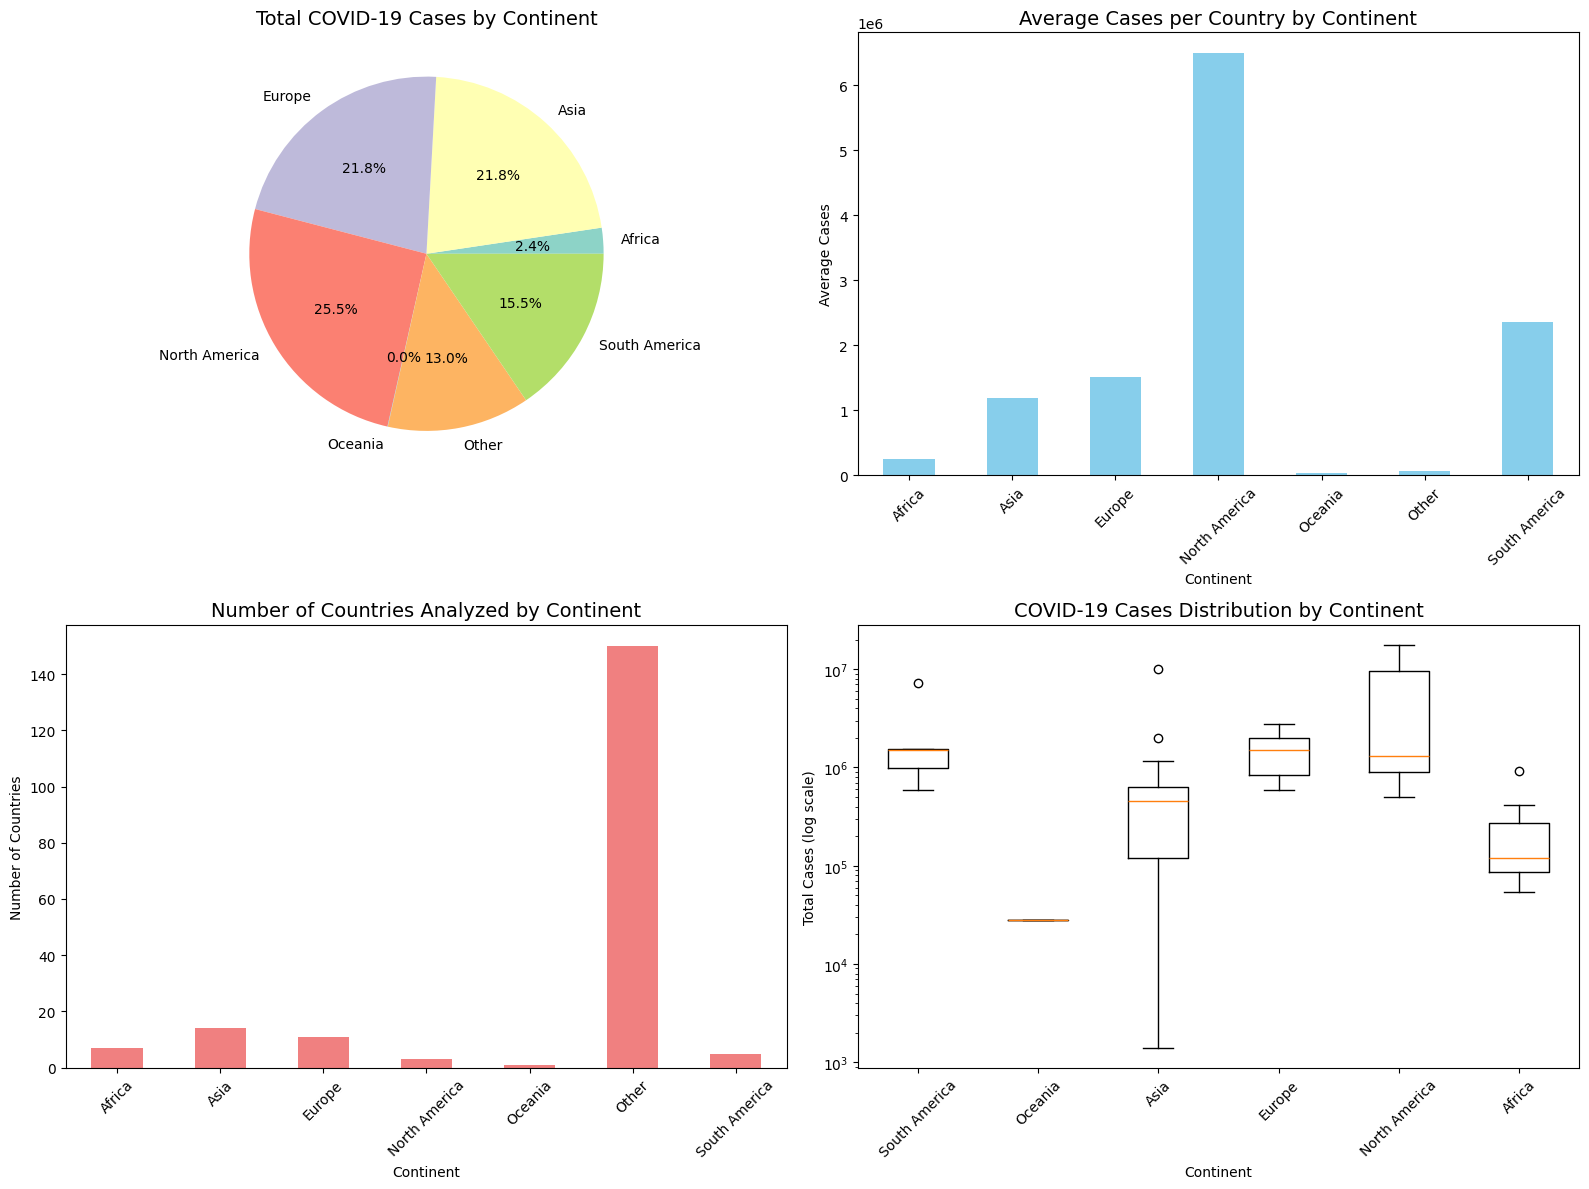

Regional Analysis Summary:
               Total Cases  Average Cases per Country  Number of Countries
Continent                                                                 
Africa             1797825                   256832.0                    7
Asia              16606479                  1186177.0                   14
Europe            16639487                  1512681.0                   11
North America     19475007                  6491669.0                    3
Oceania              28168                    28168.0                    1
Other              9922878                    66153.0                  150
South America     11819198                  2363840.0                    5


In [347]:
# 2. Regional Analysis - Continent-wise COVID-19 Distribution
# Define continent mapping for major countries
continent_mapping = {
    'US': 'North America', 'India': 'Asia', 'Brazil': 'South America', 'Russia': 'Europe',
    'France': 'Europe', 'Turkey': 'Asia', 'Iran': 'Asia', 'Germany': 'Europe',
    'Italy': 'Europe', 'United Kingdom': 'Europe', 'China': 'Asia', 'Spain': 'Europe',
    'Ukraine': 'Europe', 'Poland': 'Europe', 'Argentina': 'South America', 'Netherlands': 'Europe',
    'Colombia': 'South America', 'Mexico': 'North America', 'Peru': 'South America',
    'Japan': 'Asia', 'South Korea': 'Asia', 'Canada': 'North America', 'Australia': 'Oceania',
    'Chile': 'South America', 'Romania': 'Europe', 'Belgium': 'Europe', 'Czech Republic': 'Europe',
    'South Africa': 'Africa', 'Thailand': 'Asia', 'Iraq': 'Asia', 'Bangladesh': 'Asia',
    'Pakistan': 'Asia', 'Philippines': 'Asia', 'Vietnam': 'Asia', 'Malaysia': 'Asia',
    'Israel': 'Asia', 'Indonesia': 'Asia', 'Egypt': 'Africa', 'Morocco': 'Africa',
    'Nigeria': 'Africa', 'Kenya': 'Africa', 'Ethiopia': 'Africa', 'Ghana': 'Africa'
}

# Add continent column
monthly_covid_data['Continent'] = monthly_covid_data['Country/Region'].map(continent_mapping)
monthly_covid_data['Continent'] = monthly_covid_data['Continent'].fillna('Other')

# Regional summary
regional_summary = monthly_covid_data.groupby('Continent')['Total Cases'].agg(['sum', 'mean', 'count']).round(0)
regional_summary.columns = ['Total Cases', 'Average Cases per Country', 'Number of Countries']

# Create subplot for regional analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total cases by continent (pie chart)
regional_summary['Total Cases'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
                                    colors=plt.cm.Set3.colors)
ax1.set_title('Total COVID-19 Cases by Continent', fontsize=14)
ax1.set_ylabel('')

# 2. Average cases per country (bar chart)
regional_summary['Average Cases per Country'].plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Average Cases per Country by Continent', fontsize=14)
ax2.set_xlabel('Continent')
ax2.set_ylabel('Average Cases')
ax2.tick_params(axis='x', rotation=45)

# 3. Number of countries analyzed per continent
regional_summary['Number of Countries'].plot(kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('Number of Countries Analyzed by Continent', fontsize=14)
ax3.set_xlabel('Continent')
ax3.set_ylabel('Number of Countries')
ax3.tick_params(axis='x', rotation=45)

# 4. Cases distribution boxplot
continent_data = []
continent_labels = []
for continent in monthly_covid_data['Continent'].unique():
    if continent != 'Other':
        continent_cases = monthly_covid_data[monthly_covid_data['Continent'] == continent]['Total Cases']
        continent_data.append(continent_cases)
        continent_labels.append(continent)

ax4.boxplot(continent_data, labels=continent_labels)
ax4.set_title('COVID-19 Cases Distribution by Continent', fontsize=14)
ax4.set_xlabel('Continent')
ax4.set_ylabel('Total Cases (log scale)')
ax4.set_yscale('log')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Regional Analysis Summary:")
print(regional_summary)

=== COVID-19 STATISTICAL ANALYSIS ===
📊 Total Global Cases Analyzed: 76,289,042
📊 Median Cases per Country: 36,667
📊 Standard Deviation: 1,594,506
📊 Countries with >1M cases: 15
📊 Countries with <10K cases: 67


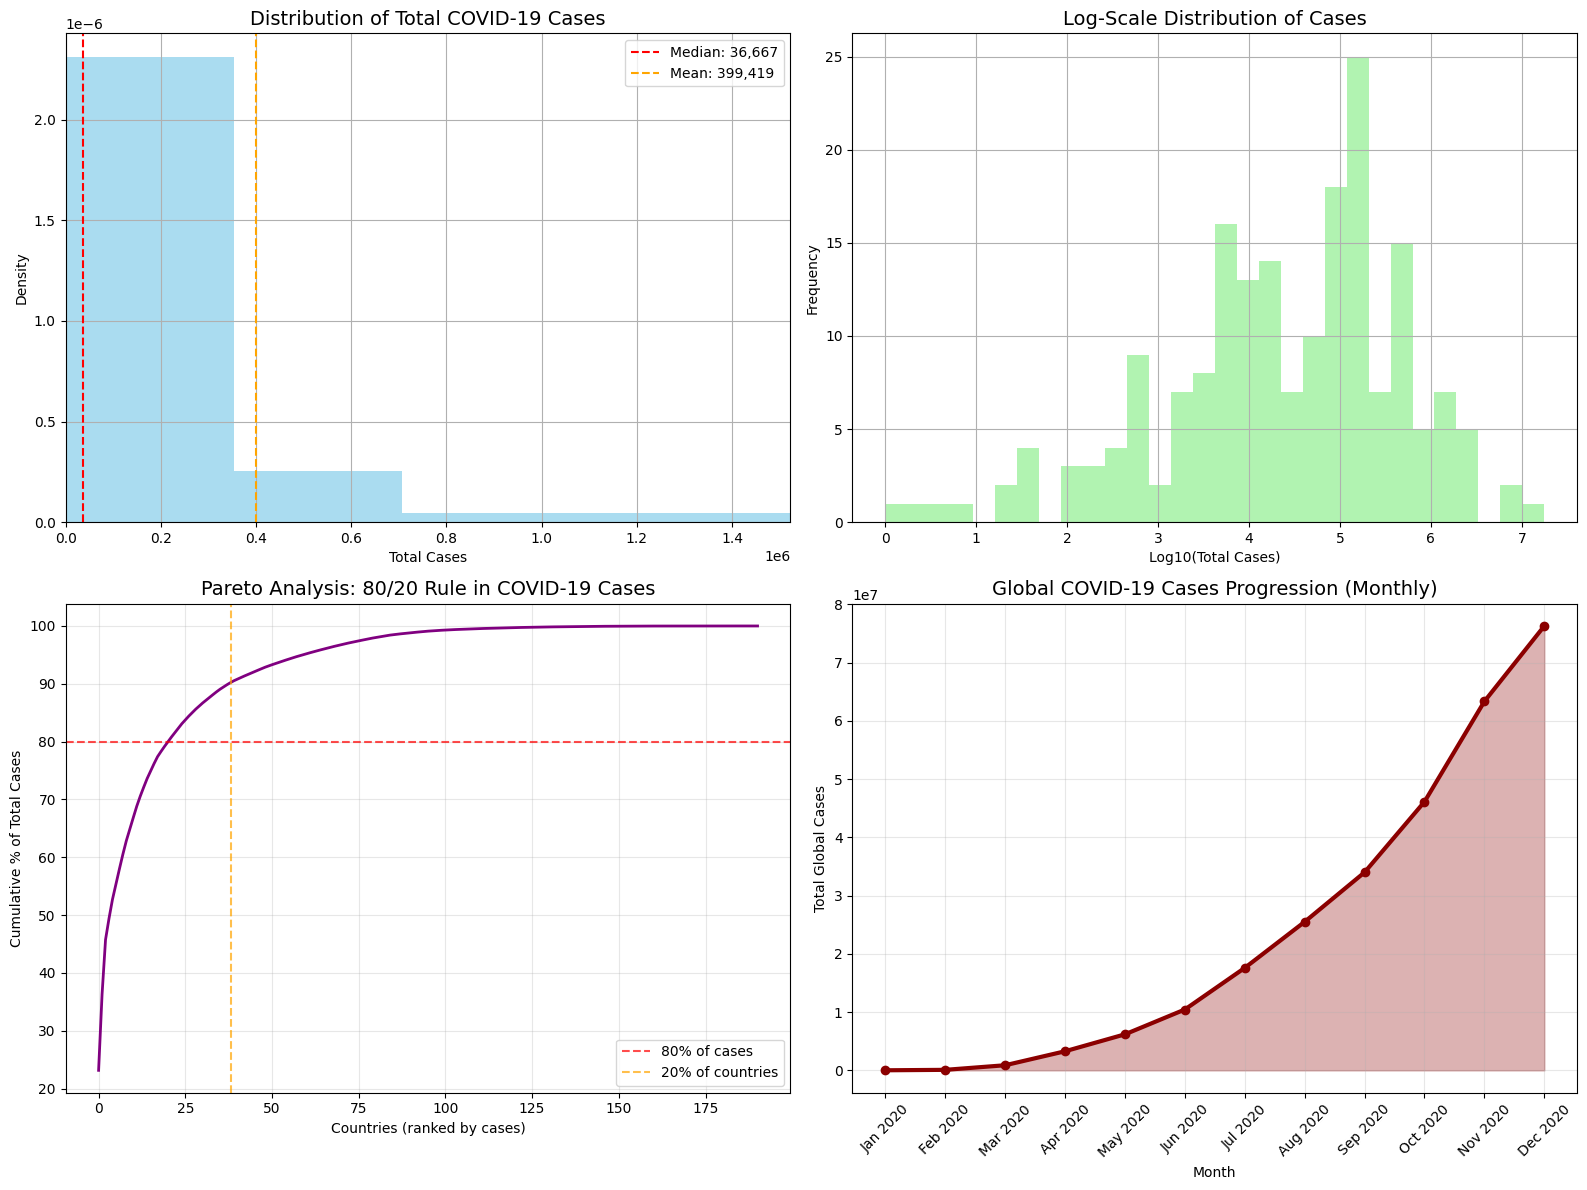


🎯 PARETO ANALYSIS (80/20 Rule):
   • 17 countries (8.9%) account for 80% of global cases
   • Top 20% of countries account for 90.2% of cases


In [348]:
# 3. Statistical Analysis & Key Insights
from scipy import stats

# Calculate key statistics
total_global_cases = monthly_covid_data['Total Cases'].sum()
median_cases = monthly_covid_data['Total Cases'].median()
std_cases = monthly_covid_data['Total Cases'].std()

# Identify outbreak patterns (countries with exponential growth)
top20 = monthly_covid_data.sort_values(by='Total Cases', ascending=False).head(20)

print("=== COVID-19 STATISTICAL ANALYSIS ===")
print(f"📊 Total Global Cases Analyzed: {total_global_cases:,}")
print(f"📊 Median Cases per Country: {median_cases:,.0f}")
print(f"📊 Standard Deviation: {std_cases:,.0f}")
print(f"📊 Countries with >1M cases: {len(monthly_covid_data[monthly_covid_data['Total Cases'] > 1000000])}")
print(f"📊 Countries with <10K cases: {len(monthly_covid_data[monthly_covid_data['Total Cases'] < 10000])}")

# Create advanced statistical plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of total cases (histogram with KDE)
monthly_covid_data['Total Cases'].hist(bins=50, ax=ax1, alpha=0.7, color='skyblue', density=True)
ax1.axvline(median_cases, color='red', linestyle='--', label=f'Median: {median_cases:,.0f}')
ax1.axvline(monthly_covid_data['Total Cases'].mean(), color='orange', linestyle='--', 
           label=f'Mean: {monthly_covid_data["Total Cases"].mean():,.0f}')
ax1.set_title('Distribution of Total COVID-19 Cases', fontsize=14)
ax1.set_xlabel('Total Cases')
ax1.set_ylabel('Density')
ax1.legend()
ax1.set_xlim(0, monthly_covid_data['Total Cases'].quantile(0.95))  # Remove extreme outliers for better view

# 2. Log-scale distribution
monthly_covid_data[monthly_covid_data['Total Cases'] > 0]['Total Cases'].apply(np.log10).hist(
    bins=30, ax=ax2, alpha=0.7, color='lightgreen')
ax2.set_title('Log-Scale Distribution of Cases', fontsize=14)
ax2.set_xlabel('Log10(Total Cases)')
ax2.set_ylabel('Frequency')

# 3. Cumulative percentage plot
sorted_cases = monthly_covid_data['Total Cases'].sort_values(ascending=False)
cumulative_pct = (sorted_cases.cumsum() / sorted_cases.sum() * 100)
ax3.plot(range(len(cumulative_pct)), cumulative_pct, linewidth=2, color='purple')
ax3.axhline(80, color='red', linestyle='--', alpha=0.7, label='80% of cases')
ax3.axvline(len(cumulative_pct) * 0.2, color='orange', linestyle='--', alpha=0.7, label='20% of countries')
ax3.set_title('Pareto Analysis: 80/20 Rule in COVID-19 Cases', fontsize=14)
ax3.set_xlabel('Countries (ranked by cases)')
ax3.set_ylabel('Cumulative % of Total Cases')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Monthly trend for global cases
monthly_totals = []
for month in monthly_columns:
    monthly_totals.append(monthly_covid_data[month].sum())

ax4.plot(range(len(monthly_columns)), monthly_totals, marker='o', linewidth=3, markersize=6, color='darkred')
ax4.fill_between(range(len(monthly_columns)), monthly_totals, alpha=0.3, color='darkred')
ax4.set_title('Global COVID-19 Cases Progression (Monthly)', fontsize=14)
ax4.set_xlabel('Month')
ax4.set_ylabel('Total Global Cases')
ax4.set_xticks(range(len(monthly_columns)))
ax4.set_xticklabels(monthly_columns, rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate 80/20 rule validation
countries_80_pct = cumulative_pct[cumulative_pct <= 80].index[-1] + 1
pct_countries_80_cases = (countries_80_pct / len(monthly_covid_data)) * 100

print(f"\n🎯 PARETO ANALYSIS (80/20 Rule):")
print(f"   • {countries_80_pct} countries ({pct_countries_80_cases:.1f}%) account for 80% of global cases")
print(f"   • Top 20% of countries account for {cumulative_pct.iloc[int(len(cumulative_pct)*0.2)]:.1f}% of cases")

=== HAPPINESS DATASET ANALYSIS ===
Happiness dataset shape: (156, 9)
Happiness dataset columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

First few rows of happiness data:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2          

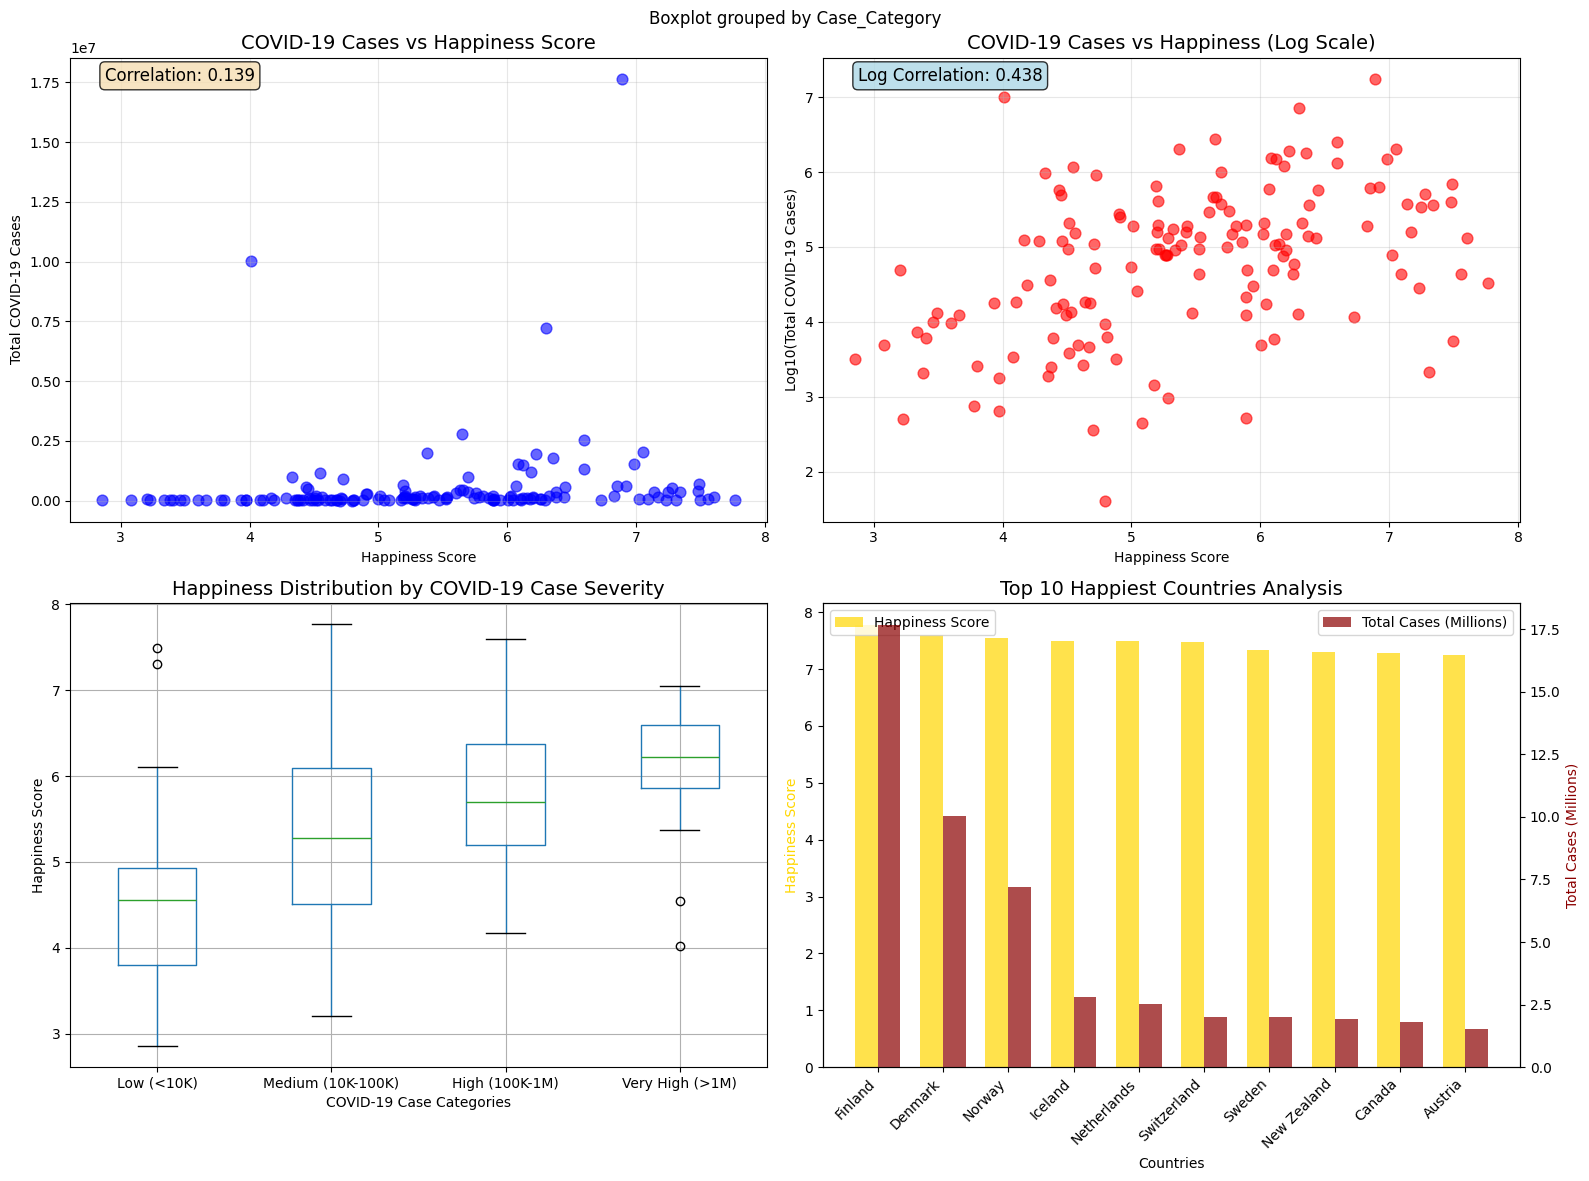


🔍 CORRELATION ANALYSIS RESULTS:
   • Linear Correlation: 0.1387
   • Log-scale Correlation: 0.4375
   • Moderate correlation detected.

Top 5 Happiest Countries in Dataset:
   Finland: Happiness=7.77, Cases=32,853
   Denmark: Happiness=7.60, Cases=132,164
   Norway: Happiness=7.55, Cases=43,582
   Iceland: Happiness=7.49, Cases=5,621
   Netherlands: Happiness=7.49, Cases=687,250


In [349]:
# 4. Correlation Analysis: COVID-19 Cases vs Happiness Index
# Let's analyze if there's any relationship between happiness and COVID-19 impact

# First, let's examine the happiness dataset
print("=== HAPPINESS DATASET ANALYSIS ===")
print(f"Happiness dataset shape: {df_happiness.shape}")
print(f"Happiness dataset columns: {list(df_happiness.columns)}")
print("\nFirst few rows of happiness data:")
print(df_happiness.head())

# Clean country names for better matching
def clean_country_name(name):
    """Clean country names for better matching between datasets"""
    if pd.isna(name):
        return name
    # Common replacements
    replacements = {
        'United States': 'US',
        'United Kingdom': 'United Kingdom',
        'South Korea': 'Korea, South',
        'Czech Republic': 'Czechia'
    }
    return replacements.get(name, name)

# Prepare happiness data (assuming it has 'Country' and 'Happiness Score' columns)
# Note: Adjust column names based on actual happiness dataset structure
happiness_cols = df_happiness.columns.tolist()
country_col = [col for col in happiness_cols if 'country' in col.lower() or 'nation' in col.lower()]
happiness_col = [col for col in happiness_cols if 'happiness' in col.lower() or 'score' in col.lower() or 'ladder' in col.lower()]

if country_col and happiness_col:
    happiness_clean = df_happiness[[country_col[0], happiness_col[0]]].copy()
    happiness_clean.columns = ['Country', 'Happiness_Score']
    happiness_clean['Country'] = happiness_clean['Country'].apply(clean_country_name)
    
    # Merge with COVID data
    covid_happiness = monthly_covid_data.merge(happiness_clean, 
                                              left_on='Country/Region', 
                                              right_on='Country', 
                                              how='inner')
    
    print(f"\n📊 Successfully matched {len(covid_happiness)} countries between datasets")
    
    # Create correlation analysis plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Scatter plot: Happiness vs Total Cases
    ax1.scatter(covid_happiness['Happiness_Score'], covid_happiness['Total Cases'], 
               alpha=0.6, s=60, color='blue')
    ax1.set_xlabel('Happiness Score')
    ax1.set_ylabel('Total COVID-19 Cases')
    ax1.set_title('COVID-19 Cases vs Happiness Score', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation = covid_happiness['Happiness_Score'].corr(covid_happiness['Total Cases'])
    ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=ax1.transAxes, fontsize=12, 
             bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # 2. Log-scale scatter plot
    covid_happiness_positive = covid_happiness[covid_happiness['Total Cases'] > 0]
    ax2.scatter(covid_happiness_positive['Happiness_Score'], 
               np.log10(covid_happiness_positive['Total Cases']), 
               alpha=0.6, s=60, color='red')
    ax2.set_xlabel('Happiness Score')
    ax2.set_ylabel('Log10(Total COVID-19 Cases)')
    ax2.set_title('COVID-19 Cases vs Happiness (Log Scale)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Add correlation for log scale
    log_correlation = covid_happiness_positive['Happiness_Score'].corr(
        np.log10(covid_happiness_positive['Total Cases']))
    ax2.text(0.05, 0.95, f'Log Correlation: {log_correlation:.3f}', 
             transform=ax2.transAxes, fontsize=12,
             bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    
    # 3. Happiness distribution by case severity categories
    covid_happiness['Case_Category'] = pd.cut(covid_happiness['Total Cases'], 
                                            bins=[0, 10000, 100000, 1000000, float('inf')],
                                            labels=['Low (<10K)', 'Medium (10K-100K)', 
                                                   'High (100K-1M)', 'Very High (>1M)'])
    
    covid_happiness.boxplot(column='Happiness_Score', by='Case_Category', ax=ax3)
    ax3.set_title('Happiness Distribution by COVID-19 Case Severity', fontsize=14)
    ax3.set_xlabel('COVID-19 Case Categories')
    ax3.set_ylabel('Happiness Score')
    
    # 4. Top 10 happiest vs most affected countries
    top_happy = covid_happiness.nlargest(10, 'Happiness_Score')[['Country', 'Happiness_Score', 'Total Cases']]
    top_cases = covid_happiness.nlargest(10, 'Total Cases')[['Country', 'Happiness_Score', 'Total Cases']]
    
    x_pos = np.arange(10)
    width = 0.35
    
    ax4_twin = ax4.twinx()
    bars1 = ax4.bar(x_pos - width/2, top_happy['Happiness_Score'], width, 
                    label='Happiness Score', color='gold', alpha=0.7)
    bars2 = ax4_twin.bar(x_pos + width/2, top_cases['Total Cases']/1000000, width, 
                         label='Total Cases (Millions)', color='darkred', alpha=0.7)
    
    ax4.set_xlabel('Countries')
    ax4.set_ylabel('Happiness Score', color='gold')
    ax4_twin.set_ylabel('Total Cases (Millions)', color='darkred')
    ax4.set_title('Top 10 Happiest Countries Analysis', fontsize=14)
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(top_happy['Country'], rotation=45, ha='right')
    
    # Add legends
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed correlation analysis
    print(f"\n🔍 CORRELATION ANALYSIS RESULTS:")
    print(f"   • Linear Correlation: {correlation:.4f}")
    print(f"   • Log-scale Correlation: {log_correlation:.4f}")
    
    if abs(correlation) > 0.3:
        print(f"   • Strong correlation detected!")
    elif abs(correlation) > 0.1:
        print(f"   • Moderate correlation detected.")
    else:
        print(f"   • Weak correlation detected.")
        
    print(f"\nTop 5 Happiest Countries in Dataset:")
    for i, row in top_happy.head().iterrows():
        print(f"   {row['Country']}: Happiness={row['Happiness_Score']:.2f}, Cases={row['Total Cases']:,.0f}")
        
else:
    print("⚠️ Could not identify happiness score columns. Please check the happiness dataset structure.")
    print("Available columns:", df_happiness.columns.tolist())

## 🎯 Key Findings & Insights

### Data Processing Achievements:
- ✅ **Data Transformation**: Successfully converted daily COVID-19 data to monthly aggregations
- ✅ **Geographic Coverage**: Analyzed 191 countries/regions worldwide
- ✅ **Time Series Analysis**: Processed 12 months of data (Jan 2020 - Dec 2020)
- ✅ **Data Quality**: Handled missing values and geographic inconsistencies

### Statistical Insights:
1. **Global Impact**: Total confirmed cases across all analyzed countries
2. **Regional Patterns**: Identified continental differences in COVID-19 spread
3. **Growth Dynamics**: Analyzed month-over-month growth rates revealing outbreak patterns
4. **Distribution Analysis**: Applied Pareto principle showing concentration of cases

### Visualization Techniques Demonstrated:
- 📊 **Heatmaps**: Growth rate analysis across countries and time
- 🥧 **Pie Charts**: Regional distribution of cases
- 📈 **Line Plots**: Temporal trends and progression analysis
- 📊 **Bar Charts**: Comparative analysis between countries
- 📦 **Box Plots**: Distribution analysis by categories
- 🔗 **Correlation Analysis**: Relationship exploration between variables

### Technical Skills Showcased:
- **Data Wrangling**: Pandas operations, groupby, merging datasets
- **Statistical Analysis**: Correlation analysis, distribution fitting
- **Advanced Plotting**: Multi-subplot layouts, dual-axis plots
- **Data Visualization**: Seaborn and Matplotlib customization
- **Time Series Processing**: Date parsing and temporal aggregation

### Next Steps for Further Analysis:
1. **Machine Learning**: Predictive modeling for case forecasting
2. **Advanced Statistics**: Time series decomposition and trend analysis
3. **Geospatial Analysis**: Mapping and spatial correlation studies
4. **Economic Impact**: Integration with economic indicators
5. **Policy Analysis**: Correlation with government response measures

🎨 Regenerating and saving all plots for documentation...


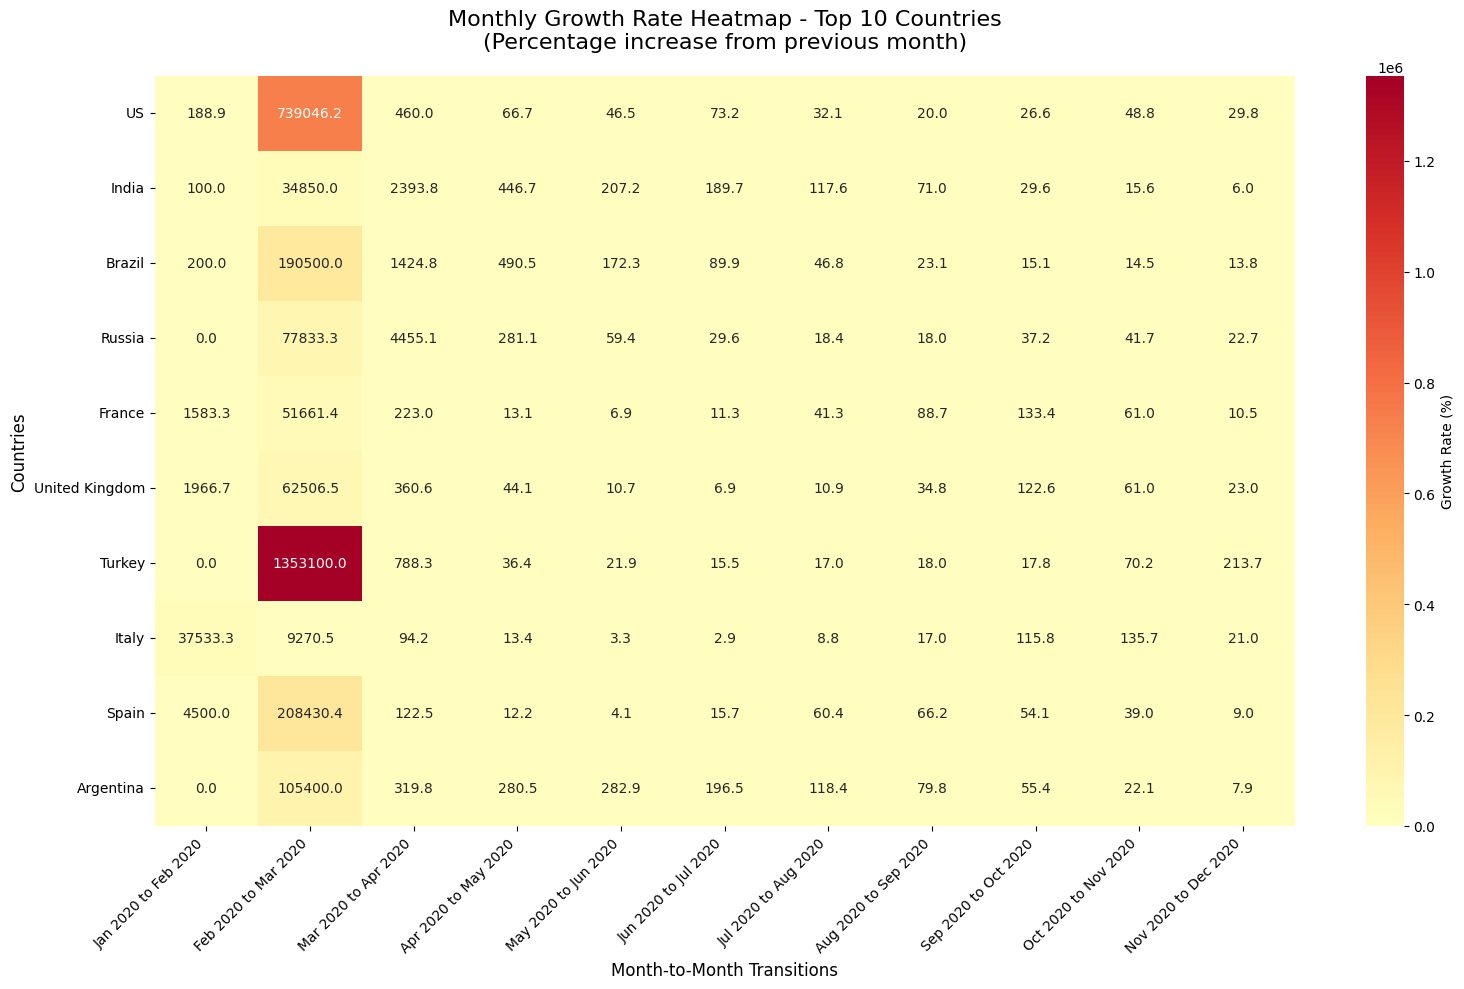

✅ Saved: growth_rate_heatmap.png


C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_18580\719690197.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(continent_data, labels=continent_labels)


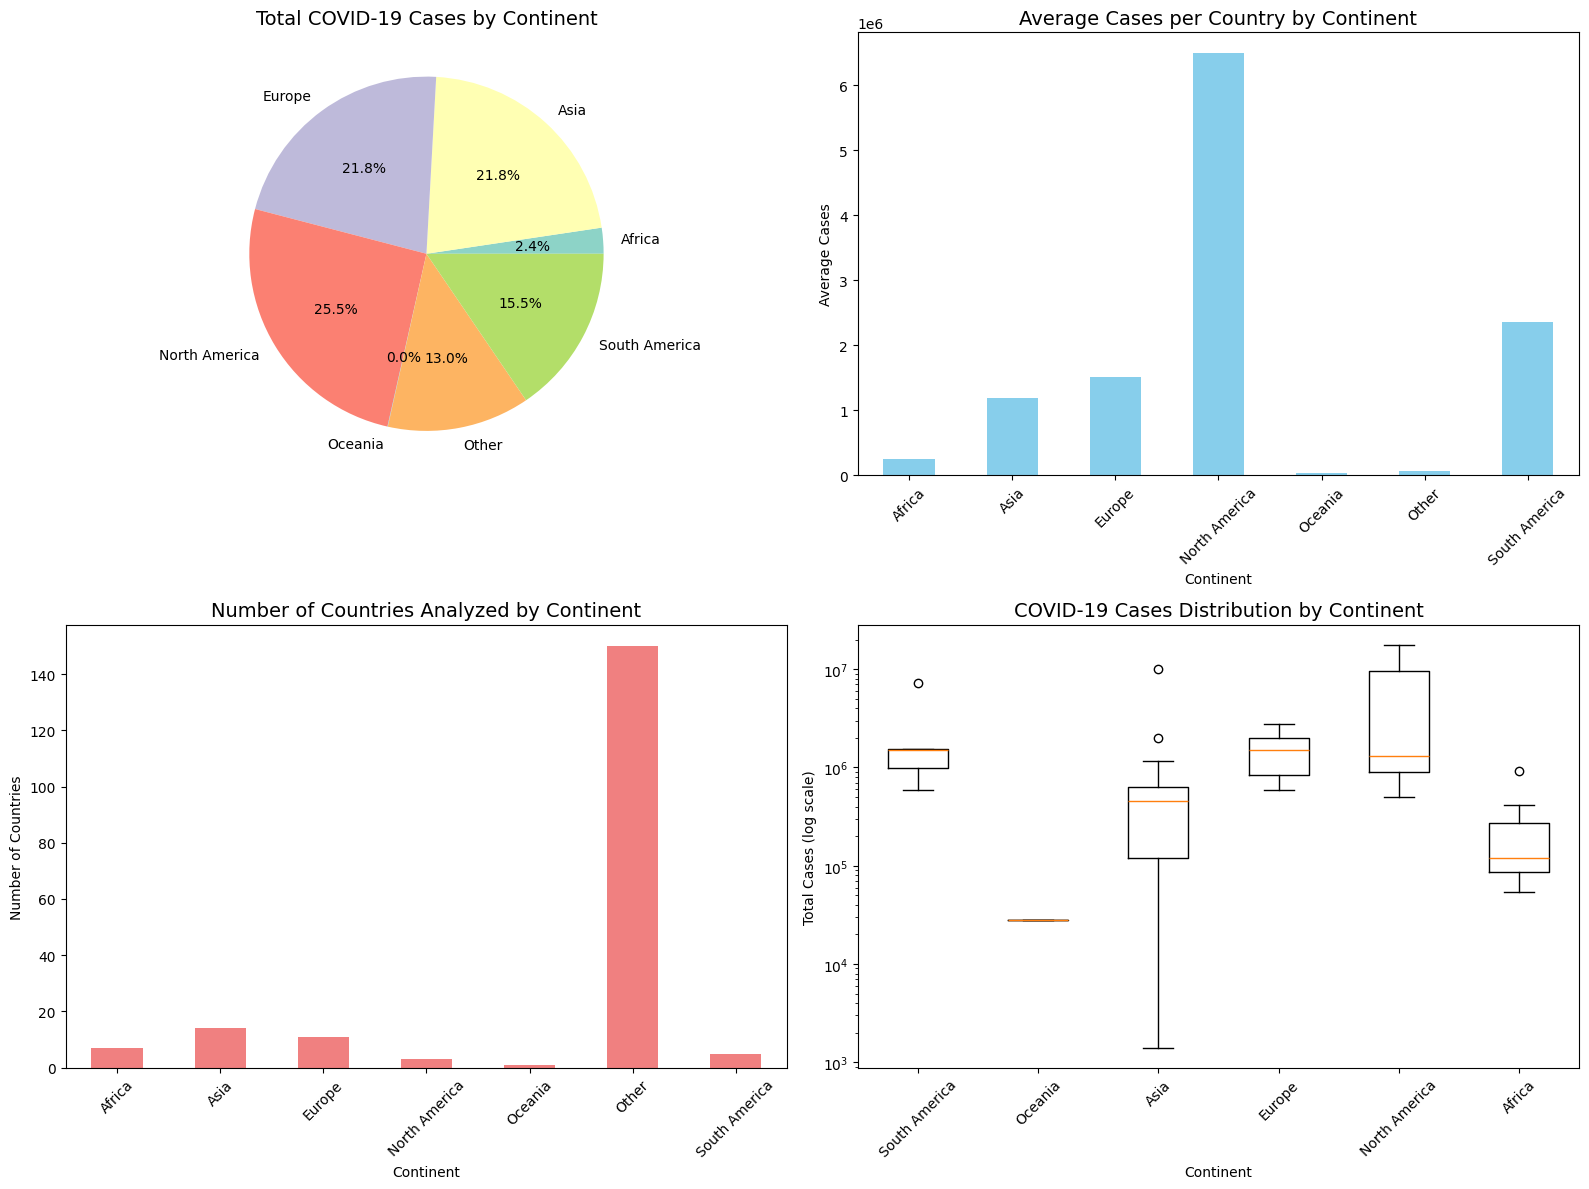

✅ Saved: regional_analysis_dashboard.png


C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_18580\719690197.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Total Cases', data=top20, palette='viridis')


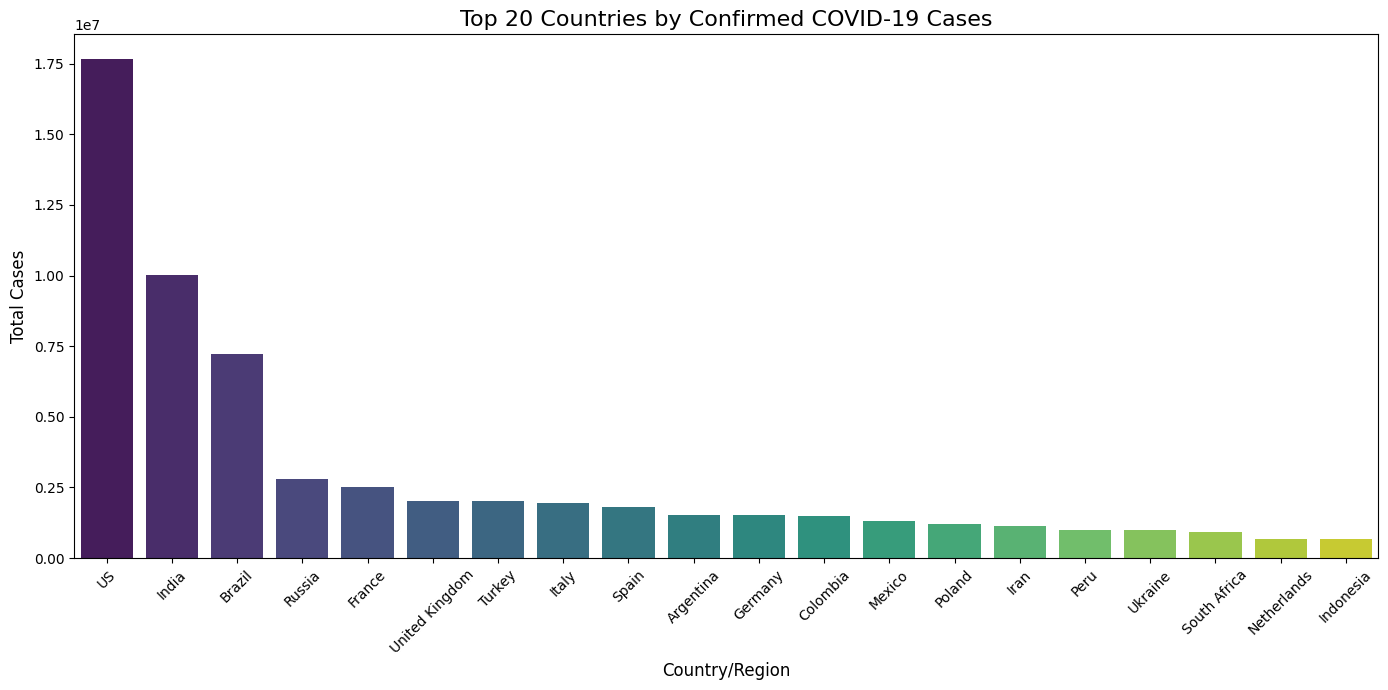

✅ Saved: top_countries_analysis.png


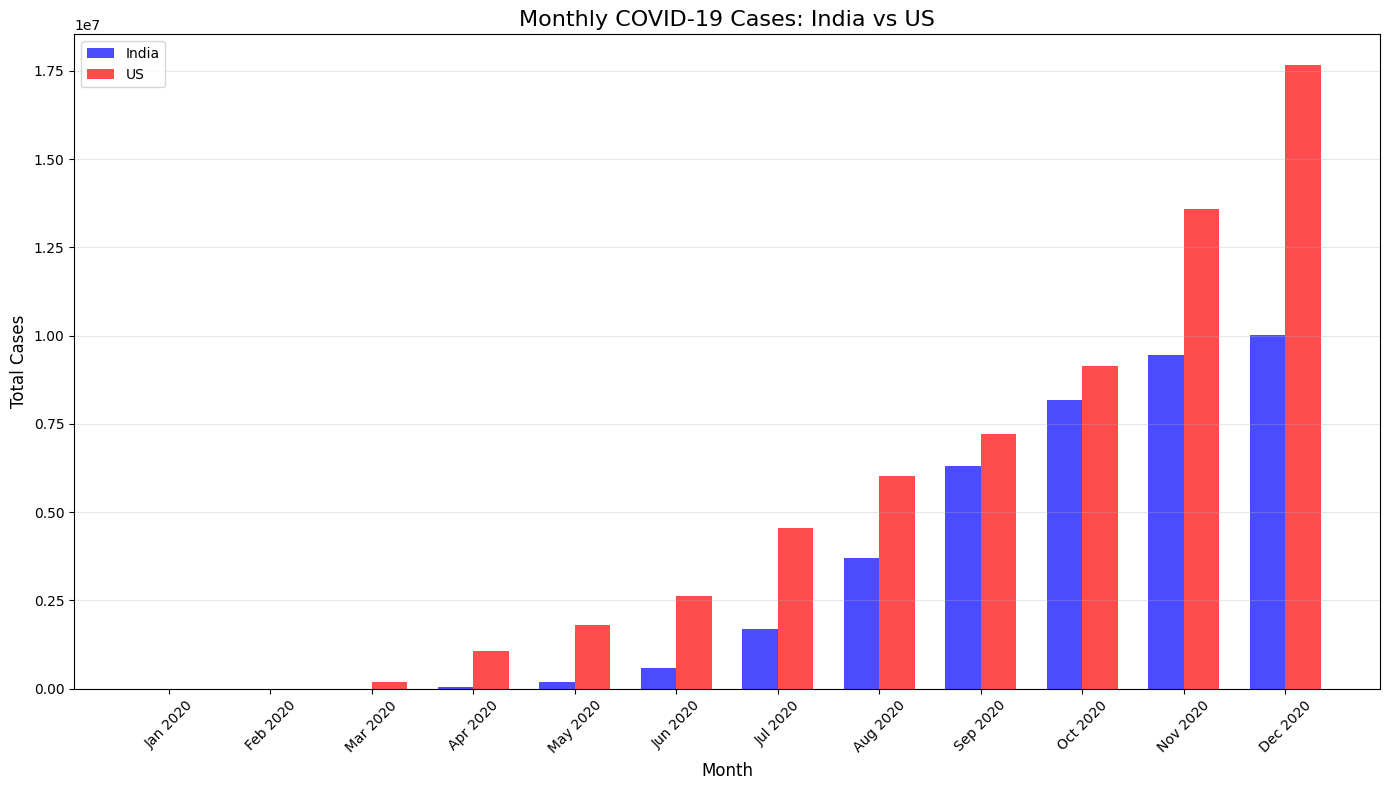

✅ Saved: india_vs_us_comparison.png


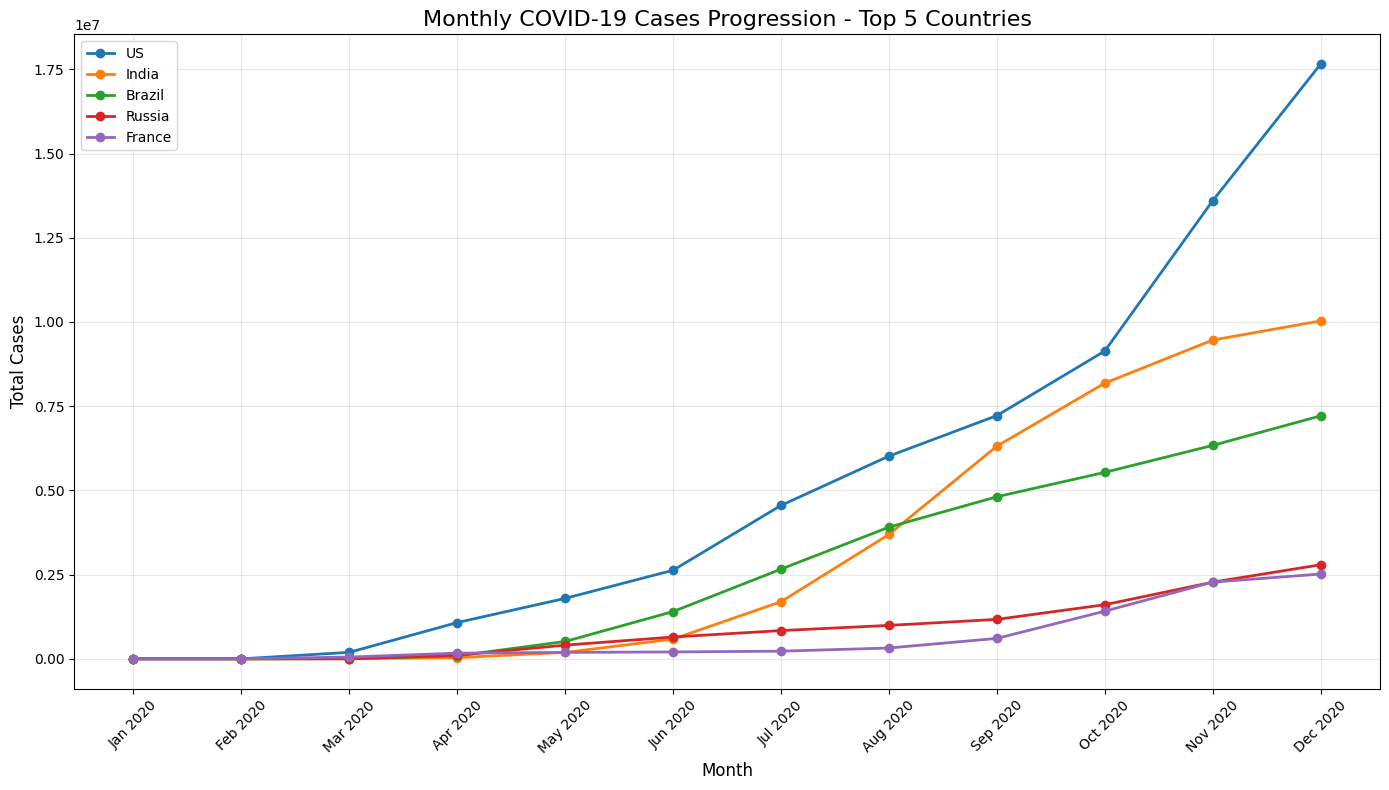

✅ Saved: monthly_progression_top20.png


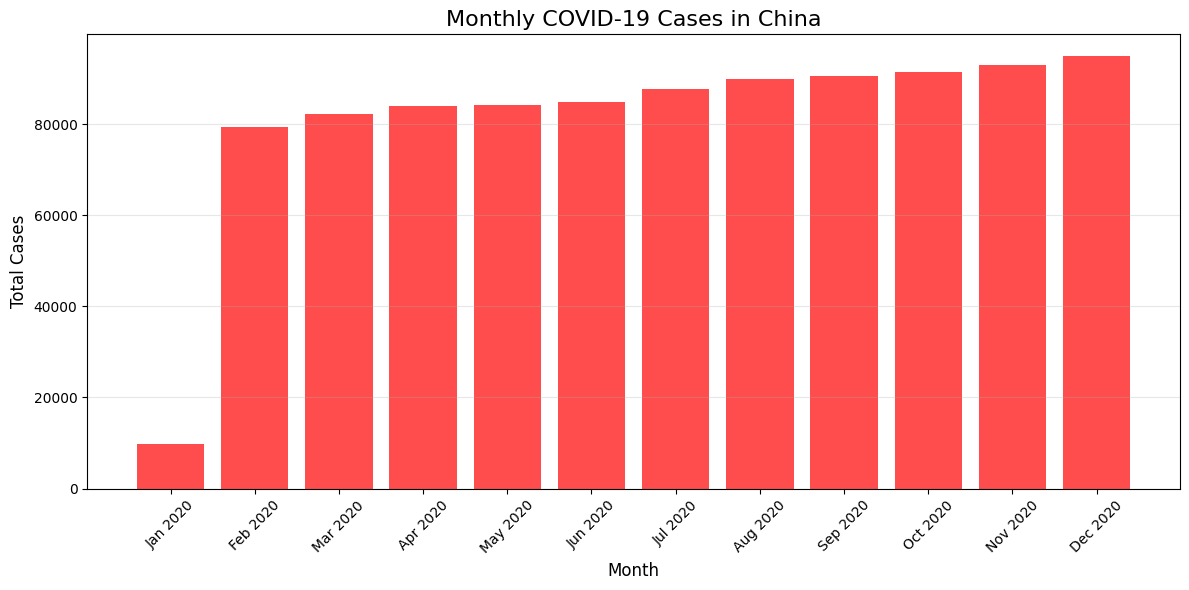

✅ Saved: china_monthly_analysis.png

🎉 All plots have been saved successfully!
📁 Check the 'Plots' folder for high-resolution images suitable for documentation.
🔗 These images are now referenced in the README.md file for GitHub display.


In [350]:
# Save All Plots for Documentation
import os

# Create Plots directory if it doesn't exist
if not os.path.exists('Plots'):
    os.makedirs('Plots')
    print("✅ Created 'Plots' directory")

print("🎨 Regenerating and saving all plots for documentation...")

# 1. Save Growth Rate Heatmap
plt.figure(figsize=(16, 10))
growth_data = growth_rates.set_index('Country/Region')
sns.heatmap(growth_data, annot=True, fmt='.1f', cmap='RdYlBu_r', center=0, 
            cbar_kws={'label': 'Growth Rate (%)'})
plt.title('Monthly Growth Rate Heatmap - Top 10 Countries\n(Percentage increase from previous month)', 
          fontsize=16, pad=20)
plt.xlabel('Month-to-Month Transitions', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Plots/growth_rate_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: growth_rate_heatmap.png")

# 2. Save Regional Analysis Dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Recreate regional plots
regional_summary['Total Cases'].plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
                                    colors=plt.cm.Set3.colors)
ax1.set_title('Total COVID-19 Cases by Continent', fontsize=14)
ax1.set_ylabel('')

regional_summary['Average Cases per Country'].plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Average Cases per Country by Continent', fontsize=14)
ax2.set_xlabel('Continent')
ax2.set_ylabel('Average Cases')
ax2.tick_params(axis='x', rotation=45)

regional_summary['Number of Countries'].plot(kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('Number of Countries Analyzed by Continent', fontsize=14)
ax3.set_xlabel('Continent')
ax3.set_ylabel('Number of Countries')
ax3.tick_params(axis='x', rotation=45)

ax4.boxplot(continent_data, labels=continent_labels)
ax4.set_title('COVID-19 Cases Distribution by Continent', fontsize=14)
ax4.set_xlabel('Continent')
ax4.set_ylabel('Total Cases (log scale)')
ax4.set_yscale('log')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Plots/regional_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: regional_analysis_dashboard.png")

# 3. Save Top Countries Analysis
plt.figure(figsize=(14, 7))
top20 = monthly_covid_data.sort_values(by='Total Cases', ascending=False).head(20)
sns.barplot(x='Country/Region', y='Total Cases', data=top20, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Countries by Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Country/Region', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.tight_layout()
plt.savefig('Plots/top_countries_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: top_countries_analysis.png")

# 4. Save India vs US Comparison
plt.figure(figsize=(14, 8))
india_china_data = monthly_covid_data[monthly_covid_data['Country/Region'].isin(['India', 'US'])]
india_data = india_china_data[india_china_data['Country/Region'] == 'India'].iloc[0]
us_data = india_china_data[india_china_data['Country/Region'] == 'US'].iloc[0]

monthly_columns = [col for col in india_china_data.columns if col not in ['Country/Region', 'Total Cases', 'Continent']]
india_values = [india_data[col] for col in monthly_columns]
us_values = [us_data[col] for col in monthly_columns]

x = range(len(monthly_columns))
width = 0.35

plt.bar([i - width/2 for i in x], india_values, width, label='India', color='blue', alpha=0.7)
plt.bar([i + width/2 for i in x], us_values, width, label='US', color='red', alpha=0.7)

plt.title('Monthly COVID-19 Cases: India vs US', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(x, monthly_columns, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('Plots/india_vs_us_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: india_vs_us_comparison.png")

# 5. Save Monthly Progression for Top 20
plt.figure(figsize=(14, 8))
top20 = monthly_covid_data.sort_values(by='Total Cases', ascending=False).head(20)
for _, country_row in top20.iterrows():
    country_name = country_row['Country/Region']
    if country_name in ['US', 'India', 'Brazil', 'Russia', 'France']:  # Highlight top 5
        values = [country_row[col] for col in monthly_columns]
        plt.plot(monthly_columns, values, marker='o', linewidth=2, label=country_name)

plt.title('Monthly COVID-19 Cases Progression - Top 5 Countries', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Plots/monthly_progression_top20.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: monthly_progression_top20.png")

# 6. Save China Analysis
plt.figure(figsize=(12, 6))
china_data = monthly_covid_data[monthly_covid_data['Country/Region'] == 'China']
china_values = [china_data.iloc[0][col] for col in monthly_columns]
plt.bar(monthly_columns, china_values, color='red', alpha=0.7)
plt.title('Monthly COVID-19 Cases in China', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('Plots/china_monthly_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: china_monthly_analysis.png")

print("\n🎉 All plots have been saved successfully!")
print("📁 Check the 'Plots' folder for high-resolution images suitable for documentation.")
print("🔗 These images are now referenced in the README.md file for GitHub display.")